In [1]:
##2224 kişiden 1502 si ölmnüş 
# kadınlar çoçuklar ve yaşlılar daha az ölmüş


In [2]:
# kütüphane import 
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
gender_data = pd.read_csv("gender_submission.csv")
combin = [train_data,test_data]

In [4]:
# columns
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# ilk 5 gözlem

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
#isim özelliği hatalı yazım yanlışı içerebilir


In [8]:
print(train_data.isnull().sum())
print("*"*50)
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
**************************************************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
train_data.info()

print("*"*40)

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
def passenger_rate(data):
    sum_passenger = data["PassengerId"].count().sum()
    titanic_all_passenger = 2224
    
    titanic_rate = (100*sum_passenger)/titanic_all_passenger
    
    
    
    return titanic_rate
    

In [12]:
passenger_rate(train_data)

40.06294964028777

In [13]:
def Suvived(data):

    output=data["Survived"]
    survived=0
    
    for i in output:
        if i == 1:
            survived += 1
    
    not_survived = output.count().sum()-survived
    
    rate = survived * 100 / ( output.count().sum() )
    return rate
    
    
            

In [14]:
Suvived(train_data)

38.38383838383838

In [15]:
def parche_rate(data):
    
    parch = data["Parch"]
    parch_0 = 0
    
    for i in parch:
        if i == 0:
            parch_0 += 1
    rate = parch_0 * 100 / ( parch.count().sum() )
    rate = round(rate,2)
    return print("Parch _Rate:",rate)
    
def sibsp_rate(data):
    
    sibSp = data["SibSp"]
    sibSp_0 = 0
    
    for i in sibSp:
        if i == 0:
            sibSp_0 += 1
            
    rate = 100-(sibSp_0 * 100 / ( sibSp.count().sum() ))

    rate = round(rate,2)
    
    return print("SibSp_rate:", rate)

parche_rate(train_data)
sibsp_rate(train_data)


Parch _Rate: 76.09
SibSp_rate: 31.76


In [16]:
train_data.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Stanley, Miss. Amy Zillah Elsie",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [17]:
def frequance(data,variable):
    var = data[variable]
    varValue=var.value_counts()
    print("{} : {}".format(variable,varValue))

In [18]:
frequance(train_data,"Ticket")

Ticket : 347082      7
1601        7
CA. 2343    7
3101295     6
CA 2144     6
           ..
7545        1
29104       1
345777      1
7267        1
347060      1
Name: Ticket, Length: 681, dtype: int64


In [19]:
frequance(train_data,"Sex")

Sex : male      577
female    314
Name: Sex, dtype: int64


In [20]:
def correlation(dataset,var1,var2):
    corr = dataset[[var1,var2]].groupby([var1],as_index=False).mean().sort_values(by=var2, ascending=False)
    
    return corr

In [21]:
print("*" * 50)
print(correlation(train_data,"Sex","Survived"))
print("*" * 50)
print(correlation(train_data,"Pclass","Survived"))
print("*" * 50)
print(correlation(train_data,"SibSp","Survived"))
print("*" * 50)
print(correlation(train_data,"Parch","Survived"))
print("*" * 50)

**************************************************
      Sex  Survived
0  female  0.742038
1    male  0.188908
**************************************************
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
**************************************************
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
**************************************************
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
**************************************************


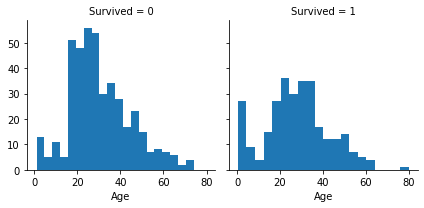

In [22]:
plot = sns.FacetGrid(train_data, col="Survived")
plot.map(plt.hist, "Age", bins=20)

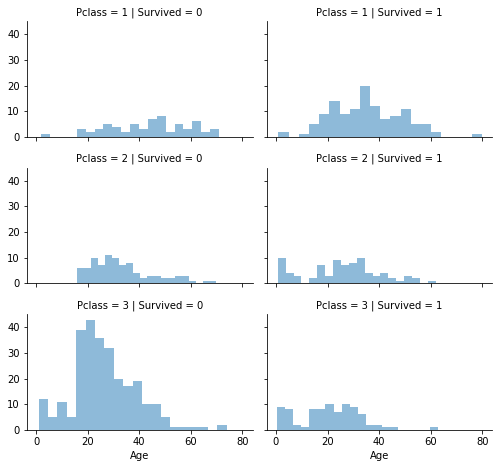

In [23]:
grid = sns.FacetGrid(train_data, col = "Survived" , row ="Pclass" , height=2.2 , aspect = 1.6)
grid.map(plt.hist , "Age" , bins = 20, alpha=.5)

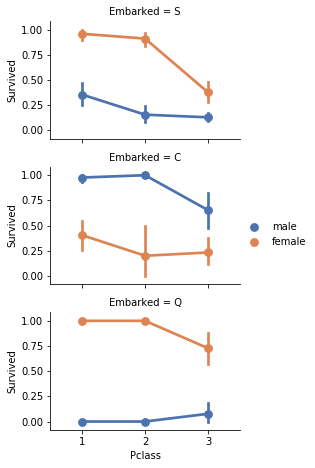

In [24]:
grid = sns.FacetGrid(train_data, row ="Embarked" , height=2.2 , aspect = 1.6 )
grid.map(sns.pointplot , "Pclass" , "Survived", "Sex" ,palette='deep', order=None, hue_order=None)
grid.add_legend()

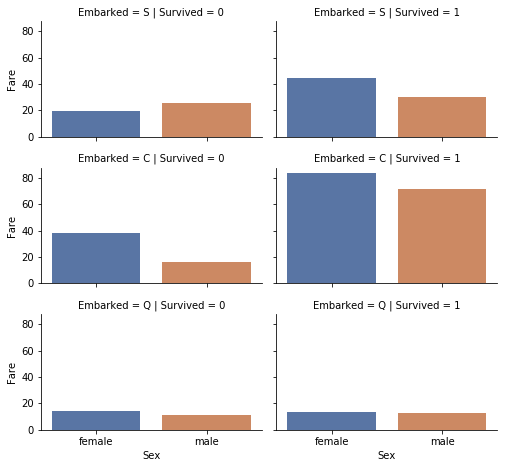

In [25]:
grid = sns.FacetGrid(train_data,col="Survived",row ="Embarked" , height=2.2 , aspect = 1.6 )
grid.map(sns.barplot , "Sex", "Fare" ,palette='deep', ci=None , order=None)
grid.add_legend()

In [26]:
print("Before",train_data.shape,test_data.shape, combin[0].shape, combin[1].shape)

train_data = train_data.drop(["Ticket", "Cabin"], axis=1)
test_data = test_data.drop(["Ticket", "Cabin"], axis=1)
combin = [train_data , test_data]

print("After",train_data.shape,test_data.shape, combin[0].shape, combin[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [27]:
print("After",train_data.shape,test_data.shape, combin[0].shape, combin[1].shape)

After (891, 10) (418, 9) (891, 10) (418, 9)


In [28]:

train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [29]:
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [30]:
for dataset in combin:
    dataset["Title"] = dataset["Title"].replace(["Lady", "Countess", "Capt", "Col",\
                                                "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Rare")
    
    dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"] = dataset["Title"].replace("Ms", "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")


train_data[["Title", "Survived"]].groupby(["Title"],as_index=False).mean()
    
    

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [31]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}


train_data['Title'] = train_data['Title'].map(title_mapping)
train_data['Title'] = train_data['Title'].fillna(0)

test_data['Title'] = test_data['Title'].map(title_mapping)
test_data['Title'] = test_data['Title'].fillna(0)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [32]:
train_data=train_data.drop(["Name","PassengerId"], axis=1)
test_data=test_data.drop(["Name"],axis=1)
combin=[train_data, test_data]
train_data.shape, test_data.shape

((891, 9), (418, 9))

In [33]:
for dataset in combin:
    dataset["Sex"] = dataset["Sex"].map({"female":1,"male":0}).astype(int)

In [34]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


C:\Users\Ibrahim\anaconda3.1\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


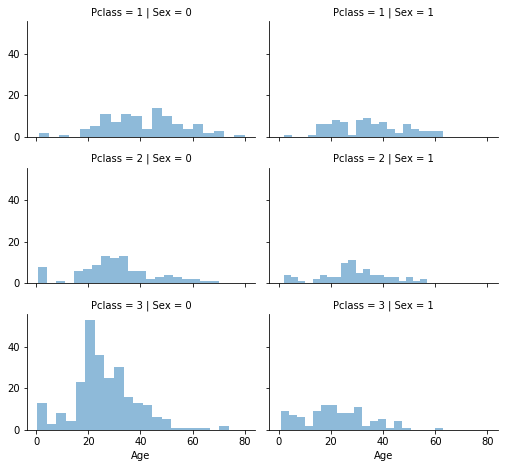

In [35]:
grid = sns.FacetGrid(train_data, row="Pclass", col="Sex", size=2.2, aspect=1.6)
grid.map(plt.hist, "Age", alpha=.5, bins=20)
grid.add_legend()

In [36]:
guess_ages=np.zeros((2,3))
guess_ages


array([[0., 0., 0.],
       [0., 0., 0.]])

In [37]:
for dataset in combin:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) &  (dataset['Pclass']== j+1)]['Age'].dropna()
            age_guess= guess_df.median()
            
            guess_ages[i,j] = int(age_guess/0.5+0.5)*0.5
            
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                        'Age'] = guess_ages[i,j]
            
    dataset["Age"] = dataset["Age"].astype(int)
            
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [38]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by="AgeBand", ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [39]:
for dataset in combin:
    dataset.loc[dataset['Age'] <= 16,'Age'] =0
    dataset.loc[(dataset['Age']>16) & (dataset['Age'] <= 32),'Age'] =1
    dataset.loc[(dataset['Age']>32) & (dataset['Age'] <= 48),'Age'] =2
    dataset.loc[(dataset['Age']>48) & (dataset['Age'] <= 64),'Age'] =3
    dataset.loc[(dataset['Age']>64) & (dataset['Age'] <= 80),'Age'] =4
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [40]:
train_data = train_data.drop(['AgeBand'],axis=1)
combine = [train_data,test_data]
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [43]:

train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

    
train_data[['FamilySize', 'Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived', ascending=False)
    

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [44]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1,'IsAlone'] = 1

train_data[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean()


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [45]:
train_data = train_data.drop(['Parch','SibSp','FamilySize'],axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'FamilySize'],axis=1)

combine=[train_data,test_data]
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [48]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
train_data.loc[:,['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [49]:
freg_port = train_data.Embarked.dropna().mode()[0]
freg_port

'S'

In [50]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freg_port)

train_data[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [51]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
    
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [52]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(),inplace=True)
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [53]:
train_data['FareBand'] = pd.qcut(train_data['Fare'],4)
train_data[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand',ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [58]:
for dataset in combine :
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.354) & (dataset['Fare']<= 31.0), 'Fare']=2
    dataset.loc[(dataset['Fare'] > 31.0) & (dataset['Fare']<= 512.329), 'Fare']=3
train_data= train_data.drop(['FareBand'], axis=1)
combine=[train_data,test_data]

train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0.0,0,1,0,3
1,1,1,1,2,3.0,1,3,0,2
2,1,3,1,1,1.0,0,2,1,3
3,1,1,1,2,3.0,0,3,0,2
4,0,3,0,2,1.0,0,1,1,6
5,0,3,0,1,1.0,2,1,1,3
6,0,1,0,3,3.0,0,1,1,3
7,0,3,0,0,2.0,0,4,0,0
8,1,3,1,1,1.0,0,3,0,3
9,1,2,1,0,2.0,1,3,0,0


In [60]:
test_data.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0.0,2,1,1,6
1,893,3,1,2,0.0,0,3,0,6
2,894,2,0,3,1.0,2,1,1,6
3,895,3,0,1,1.0,0,1,1,3
4,896,3,1,1,1.0,0,3,0,3
5,897,3,0,0,1.0,0,1,1,0
6,898,3,1,1,0.0,2,2,1,3
7,899,2,0,1,2.0,0,1,0,2
8,900,3,1,1,0.0,1,3,1,3
9,901,3,0,1,2.0,0,1,0,3


In [61]:
# model 
X_train = train_data.drop('Survived', axis=1)
Y_train = train_data['Survived']
X_test = test_data.drop("PassengerId", axis=1).copy()
X_train.shape,Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [62]:
def machineLearning(modelName):
    abbreviation = modelName()
    abbreviation.fit(X_train,Y_train)
    Y_pred = abbreviation.predict(X_test)
    acc_abbreviation = round(abbreviation.score(X_train,Y_train)*100,2)
    return acc_abbreviation

In [63]:
machineLearning(LogisticRegression)

81.37

In [64]:
machineLearning(SVC)

78.45

In [65]:
machineLearning(KNeighborsClassifier)

84.4